In [11]:
#Import Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [12]:
#import Files
file ='resources/all_data_final.csv'
alldata = pd.read_csv(file)

In [13]:
linear1={}
multilinear2={}
multilinear3={}
multilinear4={}

# Regression on All Factors

In [14]:
#Perform Linear Regression on every variable
results ={}
for value in alldata.columns[4:]:
    #Choose columns
    fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
    X = fewdata[value].values.reshape(-1, 1)
    y = fewdata["Life Expectancy"].values.reshape(-1, 1)
    
    #Split Data into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    results[value] = {"Training Score":training_score,"Testing Score": testing_score, "Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
scores = pd.DataFrame(results)
linearall = scores.transpose().sort_values(by=['Training Score'], ascending=False)
linear1["linearall"]=linearall
linearall.head()

,Training Score,Testing Score,Coefficent,y intercept
Birth Per Woman,0.631476,0.594312,-4.897717,83.920259
Water,0.619801,0.661197,0.388592,37.202419
Adult Mortality,0.574414,0.421294,-0.052676,78.691851
Schooling,0.550789,0.535701,2.400281,40.084965
Hiv/Aids,0.388830,0.353625,-1.039323,71.717165


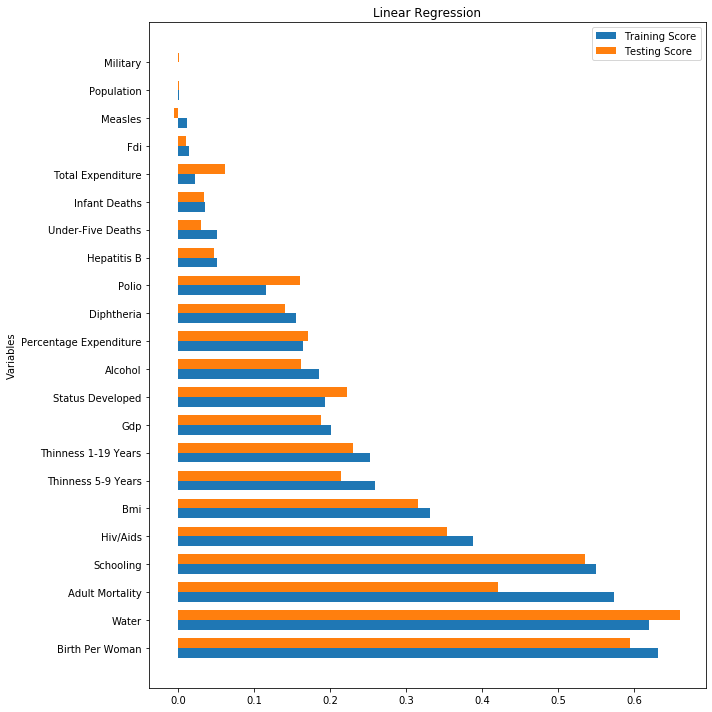

In [15]:
#Graphing Single Regression Results
lab = linearall.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(y - width/2, linearall["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, linearall["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title('Linear Regression')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig('images/linearall.png')

In [16]:
#multilinear regression with 2 variables
others =alldata.columns[4:]
resultstoo = {}
for o1 in range(len(others)-1):
    value=others[o1]
    otherstoo = others[1:]
    for other in otherstoo:
        fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
        if value != other:
            theX = [value, other]
            theX.sort()
            X = fewdata[theX]
            y = fewdata["Life Expectancy"].values.reshape(-1, 1)
            #Split Data into Train and Test
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = LinearRegression()

            model.fit(X_train, y_train)
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
scorestoo = pd.DataFrame(resultstoo)
scorestoo=scorestoo.transpose().sort_values(by=['Training Score'], ascending=False)
multilinear2["all"]=scorestoo
multilinear2["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Birth Per Woman,0.771421,0.760945,Adult Mortality,-0.031685,Birth Per Woman,-3.41736,84.8202
Birth Per Woman & Hiv/Aids,0.764904,0.753711,Birth Per Woman,-4.09412,Hiv/Aids,-0.659755,82.6597
Adult Mortality & Schooling,0.760564,0.721166,Adult Mortality,-0.0366722,Schooling,1.58561,56.3811
Hiv/Aids & Water,0.75949,0.762341,Water,-0.656011,Hiv/Aids,0.32585,43.6993
Adult Mortality & Water,0.746215,0.821887,Adult Mortality,-0.0297114,Water,0.278842,51.1527


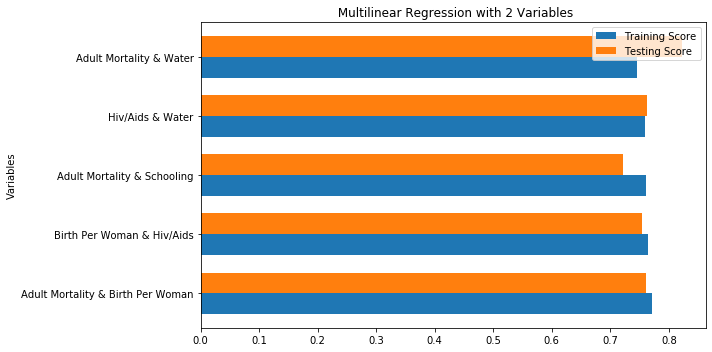

In [17]:
#Graphing 2Variable Regression Results

top5 = multilinear2["all"][:5]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 2 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all2.png')

In [18]:
#multilinear regression with 3 variables
others = alldata.columns[4:]
resultsthree ={}
for o1 in range(len(others)-2):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-1):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for other2 in othersthree:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                if (value != other) and (value != other2) and (other2 != other):
                    theX = [value, other, other2]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)
                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()
                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)
                
                    resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
scoresthree = pd.DataFrame(resultsthree)
scoresthree= scoresthree.transpose().sort_values(by=['Training Score'], ascending=False)
multilinear3["all"]=scoresthree
multilinear3["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Birth Per Woman & Schooling,0.813611,0.764852,Adult Mortality,-0.0310633,Birth Per Woman,-2.27189,Schooling,0.899421,70.4101
Birth Per Woman & Hiv/Aids & Schooling,0.813313,0.819503,Birth Per Woman,-2.30851,Schooling,-0.680872,Hiv/Aids,1.19302,62.8465
Hiv/Aids & Schooling & Water,0.81146,0.822575,Water,-0.681696,Schooling,1.11145,Hiv/Aids,0.188544,41.4262
Adult Mortality & Birth Per Woman & Thinness 1-19 Years,0.809908,0.731729,Adult Mortality,-0.0311624,Birth Per Woman,-2.97085,Thinness 1-19 Years,-0.344194,85.1552
Adult Mortality & Hiv/Aids & Schooling,0.804002,0.78439,Adult Mortality,-0.0200736,Schooling,-0.509017,Hiv/Aids,1.72223,52.9519


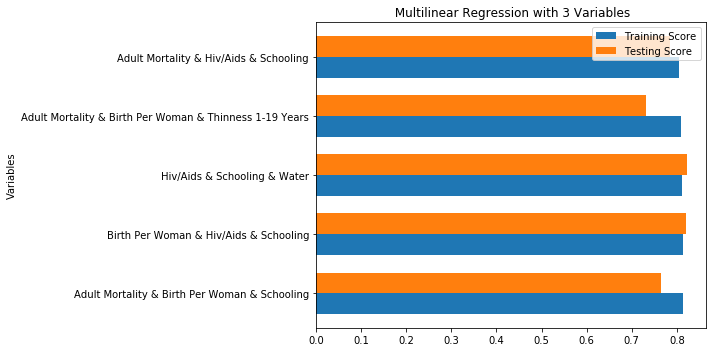

In [19]:
#Graphing 3Variable Regression Results

top5 = multilinear3["all"][:5]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 3 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all3.png')

In [10]:
#multilinear regression with 4 variables
others = alldata.columns[4:]
resultsfour ={}
for o1 in range(len(others)-3):
    value=others[o1]
    otherstoo = others[1:]
    for o2 in range(len(otherstoo)-2):
        other=otherstoo[o2+1]
        othersthree = otherstoo[1:]
        for o3 in range(len(othersthree)-1):
            other2=otherstoo[o3+2]
            othersfour = othersthree[1:]
            for other3 in othersfour:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy()
                if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                    theX = [value, other, other2,other3]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
scoresfour = pd.DataFrame(resultsfour)
scoresfour = scoresfour.transpose().sort_values(by=['Training Score'], ascending=False)
multilinear4["all"]=scoresfour
multilinear4["all"].head()

KeyboardInterrupt: 

In [ ]:
#Graphing 4Variable Regression Results

top5 = multilinear4["all"][:10]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 4 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all4.png')

# Health Vs NonHealth Variables

In [20]:
#Use if want to filter for type of variable
#cols[0] for health variables 
#cols[1] for non-health variables
cols = []
labels = ["health","nonhealth"]
cols.append(['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B','Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years','Thinness 5-9 Years'])
cols.append(['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure','Gdp', 'Population', 'Schooling','Fdi', 'Birth Per Woman', 'Water', 'Military', 'Status Developed'])
print(cols[1])

['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure', 'Gdp', 'Population', 'Schooling', 'Fdi', 'Birth Per Woman', 'Water', 'Military', 'Status Developed']


In [21]:
#linear regression with variables
for col in range(len(cols)):
    results ={}
    others = cols[col][3:]
    for value in others:
        fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
        X = fewdata[[value]]
        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

        #Split Data into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        results[value] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
        scores = pd.DataFrame(results)
        scores=scores.transpose().sort_values(by=['Training Score'], ascending=False)
        linear1[labels[col]]=scores
linear1["health"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Adult Mortality,0.523604,0.571155,Adult Mortality,-0.0509709,78.2737
Hiv/Aids,0.367592,0.406858,Hiv/Aids,-1.02627,71.8588
Bmi,0.342279,0.28058,Bmi,0.271922,59.3191
Thinness 5-9 Years,0.250548,0.247233,Thinness 5-9 Years,-1.00523,74.699
Thinness 1-19 Years,0.243532,0.255034,Thinness 1-19 Years,-1.00232,74.6243


In [22]:
linear1["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Water,0.631781,0.627127,Water,0.394951,36.5191
Birth Per Woman,0.615722,0.644495,Birth Per Woman,-4.93038,83.9511
Schooling,0.538337,0.572631,Schooling,2.33956,40.733
Gdp,0.199635,0.193592,Gdp,0.00032597,67.8149
Status Developed,0.1925,0.223358,Status Developed,10.4287,68.1713


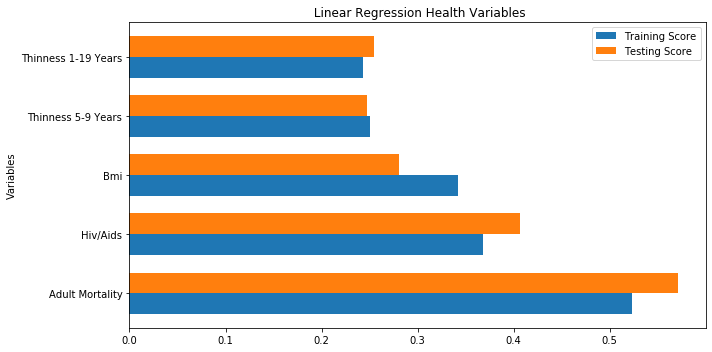

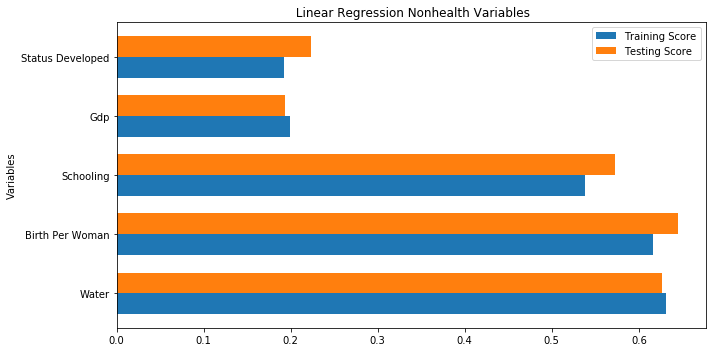

In [23]:
#Graphing 1Variable Regression Results
for label in labels:
    top5 = linear1[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}1.png')

In [24]:
#multilinear regression with 2 variables
for col in range(len(cols)):
    resultstoo ={}
    others = cols[col][3:]
    for o1 in range(len(others)-1):
        value=others[o1]
        otherstoo = others[1:]
        for other in otherstoo:
            fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
            if value != other:
                theX = [value, other]
                theX.sort()
                X = fewdata[theX]
                y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                #Split Data into Train and Test
                X_train, X_test, y_train, y_test = train_test_split(X, y)

                model = LinearRegression()

                model.fit(X_train, y_train)
                training_score = model.score(X_train, y_train)
                testing_score = model.score(X_test, y_test)

                resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
    scorestoo = pd.DataFrame(resultstoo)
    scorestoo=scorestoo.transpose().sort_values(by=['Training Score'], ascending=False)
    multilinear2[labels[col]]=scorestoo
multilinear2["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Bmi,0.631903,0.657869,Adult Mortality,-0.0409797,Bmi,0.180341,69.6616
Adult Mortality & Thinness 5-9 Years,0.628486,0.577723,Adult Mortality,-0.0451698,Thinness 5-9 Years,-0.544901,80.0783
Adult Mortality & Thinness 1-19 Years,0.614466,0.630679,Adult Mortality,-0.0453608,Thinness 1-19 Years,-0.592955,80.1206
Adult Mortality & Diphtheria,0.590969,0.56166,Adult Mortality,-0.0477076,Diphtheria,0.0889893,70.2172
Adult Mortality & Infant Deaths,0.590594,0.443046,Adult Mortality,-0.0517421,Infant Deaths,-0.0100464,78.872


In [25]:
multilinear2["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Birth Per Woman & Water,0.684156,0.649503,Water,-2.61226,Birth Per Woman,0.215811,59.0385
Birth Per Woman & Schooling,0.681127,0.644007,Birth Per Woman,-3.33899,Schooling,1.07059,66.109
Gdp & Water,0.677919,0.625308,Water,0.00014352,Gdp,0.365537,38.1202
Schooling & Water,0.67616,0.684359,Water,1.03382,Schooling,0.265166,34.8362
Percentage Expenditure & Water,0.671549,0.642233,Water,0.000987679,Percentage Expenditure,0.3627,38.6328


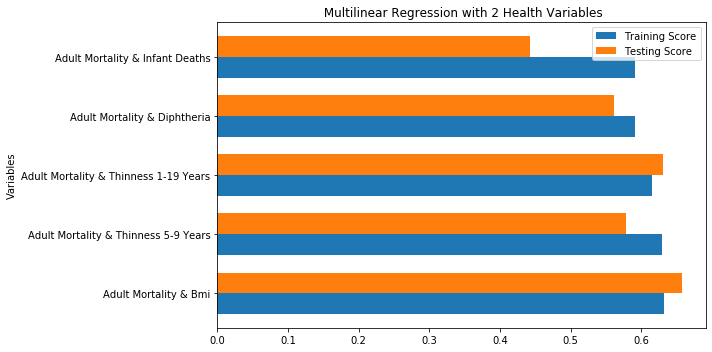

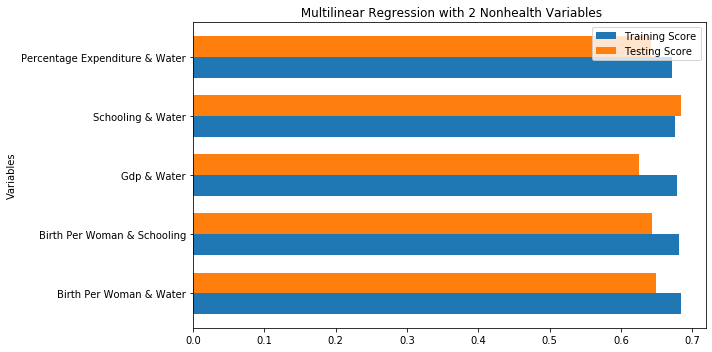

In [26]:
#Graphing 2Variable Regression Results
for label in labels:
    top5 = multilinear2[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 2 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [27]:
#multilinear regression with 3 variables
for col in range(len(cols)):
    others = cols[col][3:]
    resultsthree ={}
    for o1 in range(len(others)-2):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-1):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for other2 in othersthree:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                    if (value != other) and (value != other2) and (other2 != other):
                        theX = [value, other, other2]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()
                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
    scoresthree = pd.DataFrame(resultsthree)
    scoresthree= scoresthree.transpose().sort_values(by=['Training Score'], ascending=False)
    multilinear3[labels[col]]=scoresthree
multilinear3["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Bmi & Polio,0.686426,0.571723,Adult Mortality,-0.0421868,Polio,0.150649,Bmi,0.0532493,66.7918
Adult Mortality & Bmi & Diphtheria,0.680308,0.632266,Adult Mortality,-0.0405354,Diphtheria,0.156565,Bmi,0.0736854,64.274
Adult Mortality & Bmi & Under-Five Deaths,0.676551,0.565574,Adult Mortality,-0.044183,Under-Five Deaths,0.141889,Bmi,-0.00495537,72.086
Adult Mortality & Bmi & Measles,0.671461,0.538228,Adult Mortality,-0.0430249,Bmi,0.160877,Measles,-2.8078e-05,70.8716
Adult Mortality & Bmi & Hiv/Aids,0.668836,0.699931,Adult Mortality,-0.0311106,Hiv/Aids,0.163734,Bmi,-0.432357,69.5143


In [28]:
multilinear3["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Birth Per Woman & Gdp & Water,0.709272,0.699234,Water,-2.43626,Birth Per Woman,0.000133797,Gdp,0.190193,59.9975
Birth Per Woman & Status Developed & Water,0.70886,0.64158,Water,-2.21134,Status Developed,3.35121,Birth Per Woman,0.221178,57.0174
Birth Per Woman & Schooling & Water,0.705241,0.685992,Water,-1.96706,Birth Per Woman,0.792902,Schooling,0.173896,50.8194
Birth Per Woman & Percentage Expenditure & Schooling,0.703242,0.64545,Percentage Expenditure,-3.54557,Birth Per Woman,0.000638118,Schooling,0.814941,69.4155
Percentage Expenditure & Schooling & Water,0.701839,0.667524,Percentage Expenditure,0.0006867,Water,0.754281,Schooling,0.287423,35.7925


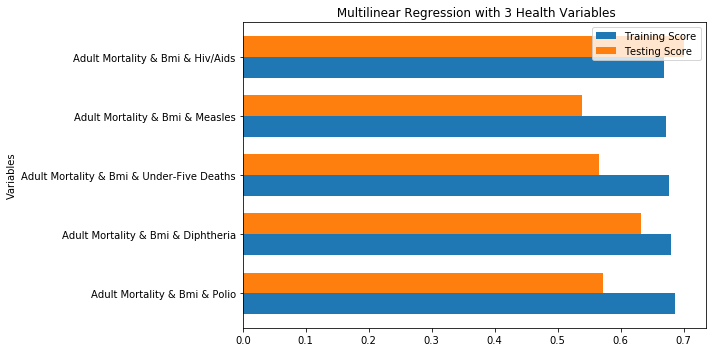

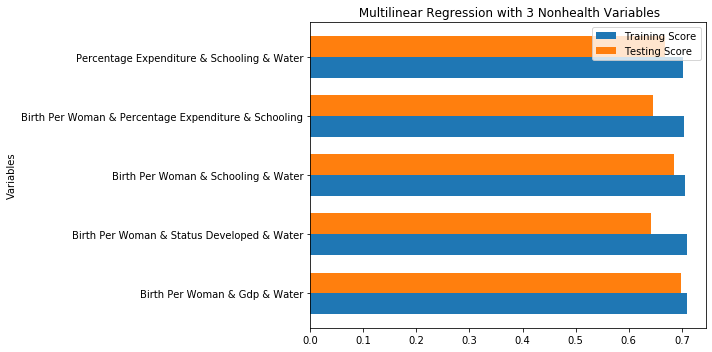

In [29]:
#Graphing 3Variable Regression Results
for label in labels:
    top5 = multilinear3[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 3 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [ ]:
#multilinear regression with 4 variables
for col in range(len(cols)):
    others = cols[col][3:]
    resultsfour ={}
    for o1 in range(len(others)-3):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-2):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for o3 in range(len(othersthree)-1):
                other2=otherstoo[o3+2]
                othersfour = othersthree[1:]
                for other3 in othersfour:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy()
                    if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                        theX = [value, other,other2,other3]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
    scoresfour = pd.DataFrame(resultsfour)
    scoresfour = scoresfour.transpose().sort_values(by=['Training Score'], ascending=False)
    multilinear4[labels[col]]=scoresfour
multilinear4["health"].head()

In [ ]:
multilinear4["nonhealth"].head()

In [ ]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear4[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 4 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# Developed Vs Developing Countries

In [30]:
#Create a Developing Dataset and Developed Dataset
developed = alldata.copy().rename(columns={"Status Developed":"Developed"})
developed = developed[developed.columns[1:]]
developing = alldata.copy()
developing["Status Developed"] = developing["Status Developed"].replace(0, 2).replace(1, 0).replace(2, 1)
developing = developing.rename(columns={"Status Developed":"Developing"})
developing = developing[developing.columns[1:]]
datasets = [developed, developing]
labels = ["Developed", "Developing"]

#Split Dataset into Developing and Developed Countries
developed = developed.drop(x for x in developed["Developed"].index if developed.loc[x]["Developed"] == 0)
developed = developed[developed.columns[:-1]]
developing = developing.drop(x for x in developing["Developing"].index if developing.loc[x]["Developing"] == 0)
developing = developing[developing.columns[:-1]]
developing.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,...,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Schooling,Fdi,Birth Per Woman,Water,Military
0,afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,10.1,0.849679,4.80,61.5,0.993455
1,afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.1,612.696514,327582.0,17.5,17.5,10.0,0.209790,4.98,58.8,1.298013
2,afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.1,631.744976,31731688.0,17.7,17.7,9.9,0.234965,5.17,56.2,1.076950
3,afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.1,669.959000,3696958.0,17.9,18.0,9.8,0.284095,5.38,53.5,1.175417
4,afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.1,63.537231,2978599.0,18.2,18.2,9.5,0.293039,5.60,50.9,1.821346


In [31]:
#Creating Labels and columns list
datasets = [developed, developing]
labels = ["developed", "developing"]

In [32]:
#Linear regression 
regress1=[]
for index in range(len(datasets)):
    label = labels[index]
    results ={}
    for value in alldata.columns[4:]:
        #Choose columns
        fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
        X = fewdata[value].values.reshape(-1, 1)
        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

        #Split Data into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        results[value] = {"Training Score":training_score,"Testing Score": testing_score, "Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
    scores = pd.DataFrame(results)
    scores = scores.transpose().sort_values(by=['Training Score'], ascending=False)
    regress1.append(scores)
    linear1[labels[index]] = scores
linear1["developing"]

,Training Score,Testing Score,Coefficent,y intercept
Birth Per Woman,0.635943,0.586225,-4.826686e+00,83.742879
Water,0.622764,0.657620,3.869427e-01,37.367469
Schooling,0.551463,0.534862,2.383965e+00,40.407672
Adult Mortality,0.536498,0.525651,-5.135394e-02,78.257146
Hiv/Aids,0.385165,0.360502,-1.024718e+00,71.753801
Bmi,0.341268,0.283345,2.715158e-01,59.491483
Thinness 1-19 Years,0.242882,0.255602,-9.919081e-01,74.659629
Thinness 5-9 Years,0.240920,0.276150,-9.513577e-01,74.481212
Gdp,0.212672,0.131005,3.213546e-04,67.529729
Status Developed,0.200140,0.191782,1.067521e+01,68.318646


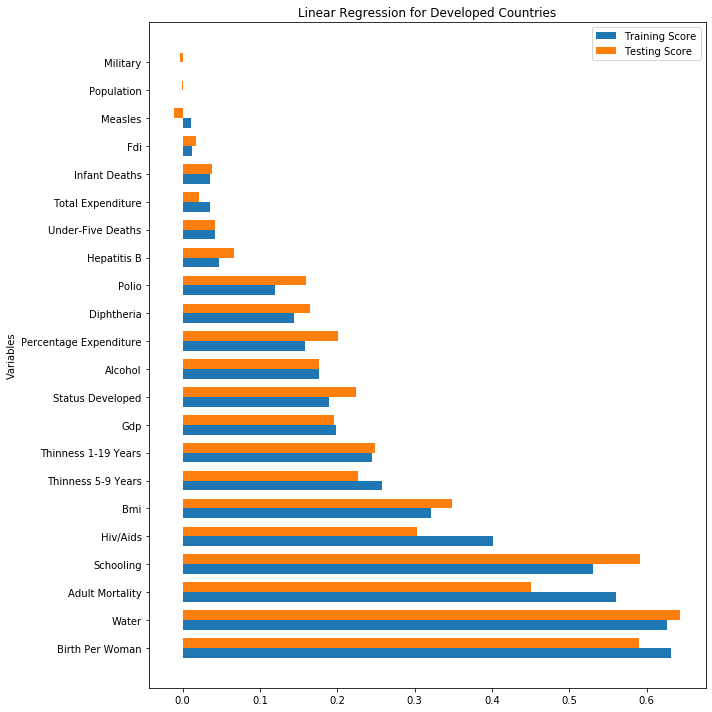

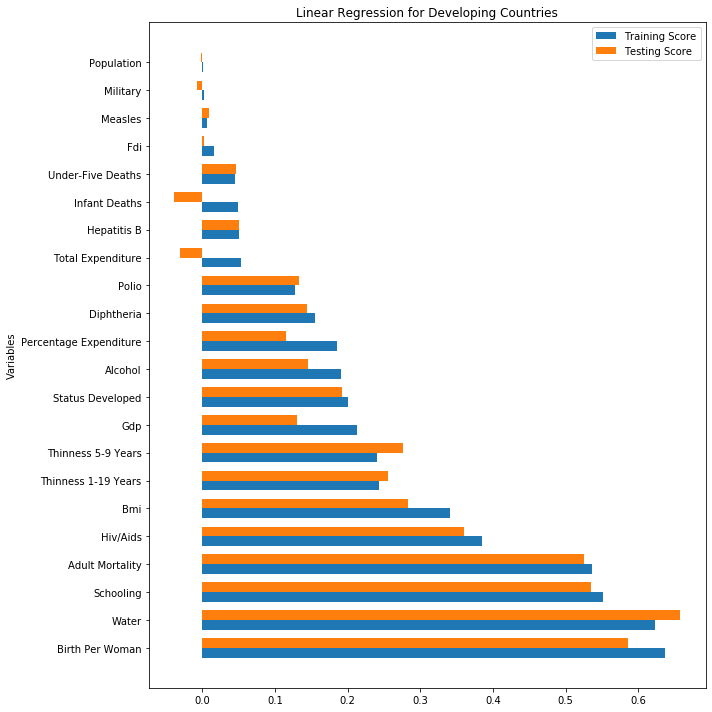

In [33]:
#Graphing Single Regression Results
for label in labels:
    lab = linear1[label].index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 10))
    rects1 = ax.barh(y - width/2, linear1[label]["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, linear1[label]["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f'Linear Regression for {label.title()} Countries')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/linear1{label}.png')

In [34]:
#multilinear regression with 2 variables
for index in range(len(datasets)):
    label = labels[index]
    resultstoo ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-1):
        value=others[o1]
        otherstoo = others[1:]
        for other in otherstoo:
            fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
            if (value != other):
                theX = [value, other]
                theX.sort()
                X = fewdata[theX]
                y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                #Split Data into Train and Test
                X_train, X_test, y_train, y_test = train_test_split(X, y)

                model = LinearRegression()

                model.fit(X_train, y_train)
                training_score = model.score(X_train, y_train)
                testing_score = model.score(X_test, y_test)

                resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
    scorestoo = pd.DataFrame(resultstoo)
    scorestoo = scorestoo.transpose().sort_values(by=['Training Score'], ascending=False)
    multilinear2[labels[index]] = scorestoo
multilinear2["developing"]

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Birth Per Woman,0.766504,0.773615,Adult Mortality,-0.0303651,Birth Per Woman,-3.48551,84.8986
Hiv/Aids & Water,0.759187,0.763195,Water,-0.667054,Hiv/Aids,0.324851,43.7838
Birth Per Woman & Hiv/Aids,0.758859,0.770299,Birth Per Woman,-4.08458,Hiv/Aids,-0.670086,82.5969
Hiv/Aids & Schooling,0.75749,0.734382,Schooling,-0.771103,Hiv/Aids,2.01115,46.453
Adult Mortality & Water,0.755664,0.796692,Adult Mortality,-0.0300059,Water,0.285188,50.7776
...,...,...,...,...,...,...,...
Fdi & Population,0.0163854,0.00878926,Fdi,0.044373,Population,-3.76805e-09,69.6725
Fdi & Military,0.0159555,-0.00200501,Fdi,0.0406593,Military,-0.121389,70.0509
Measles & Population,0.00937634,-0.000199835,Population,-7.7371e-05,Measles,-3.7378e-12,70.0357
Measles & Military,0.00256132,0.00943926,Measles,-3.86068e-05,Military,-0.114411,70.411


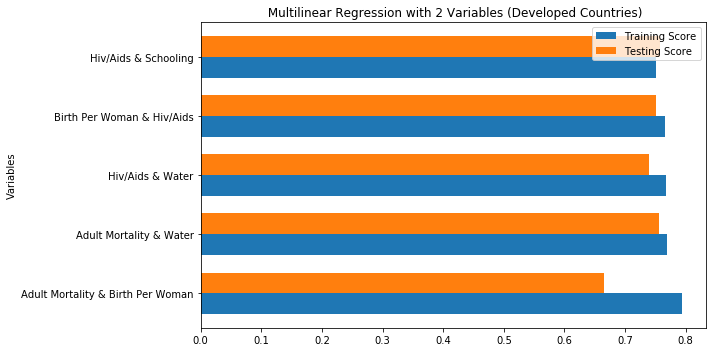

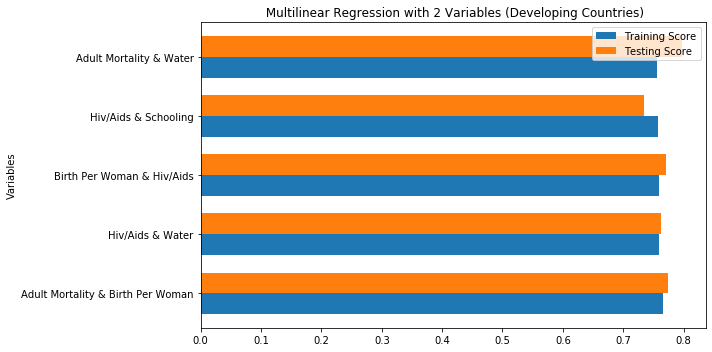

In [35]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear2[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 2 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [36]:
#multilinear regression with 3 variables
for index in range(len(datasets)):
    label = labels[index]
    resultsthree ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-2):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-1):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for other2 in othersthree:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                if (value != other) and (value != other2) and (other2 != other):
                    theX = [value, other,other2]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1,1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
    scoresthree = pd.DataFrame(resultsthree)
    scoresthree=scoresthree.transpose().sort_values(by=['Training Score'], ascending=False)
    multilinear3[labels[index]]=scoresthree
multilinear3["developing"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Birth Per Woman & Hiv/Aids & Schooling,0.818323,0.803937,Birth Per Woman,-2.28271,Schooling,-0.688846,Hiv/Aids,1.16943,63.2903
Hiv/Aids & Schooling & Water,0.81496,0.814183,Schooling,-0.658851,Water,1.11174,Hiv/Aids,0.194887,40.8879
Adult Mortality & Birth Per Woman & Schooling,0.813631,0.761049,Adult Mortality,-0.0313958,Birth Per Woman,-2.20754,Schooling,0.858447,70.6795
Adult Mortality & Birth Per Woman & Hiv/Aids,0.812247,0.775435,Adult Mortality,-0.0206684,Birth Per Woman,-3.51513,Hiv/Aids,-0.410768,83.9341
Birth Per Woman & Hiv/Aids & Percentage Expenditure,0.809651,0.75959,Birth Per Woman,-3.77641,Hiv/Aids,-0.656948,Percentage Expenditure,0.000950395,81.2036


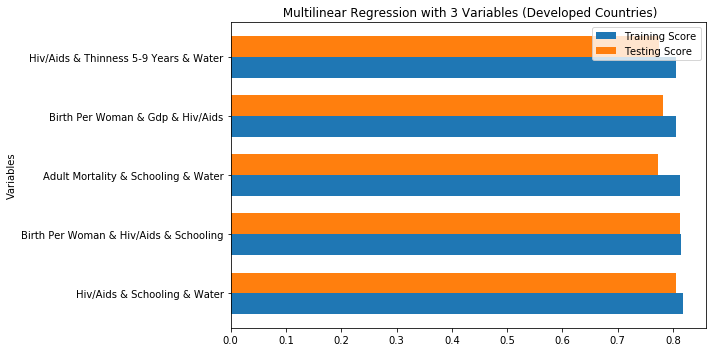

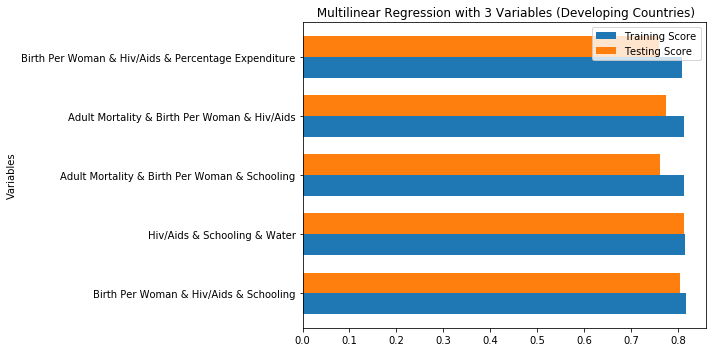

In [37]:
#Graphing 3Variable Regression Results
for label in labels:
    top5 = multilinear3[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 3 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [ ]:
#multilinear regression with 4 variables
for index in range(len(datasets)):
    label = labels[index]
    resultsfour ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-3):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-2):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for o3 in range(len(othersthree)-1):
                other=otherstoo[o3+2]
                othersfour = othersthree[1:]
                for other3 in othersfour:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy().dropna(how="any")
                    if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                        theX = [value, other,other2,other3]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
    scoresfour = pd.DataFrame(resultsfour)
    scoresfour =scoresfour.transpose().sort_values(by=['Training Score'], ascending=False)
    multilinear4[labels[index]] = scoresfour
multilinear4["developing"].head()

In [ ]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear4[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 4 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# Developed Vs Developing Countries For Different Factors

In [38]:
labels = ["health","nonhealth"]
datalabels = ["developed", "developing"]
thelabels = ["health_developed","health_developing","nonhealth_developed","nonhealth_developing"]
cols = []
cols.append(['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B','Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years','Thinness 5-9 Years'])
cols.append(['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure','Gdp', 'Population', 'Schooling','Fdi', 'Birth Per Woman', 'Water', 'Military'])
print(cols[1])

['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure', 'Gdp', 'Population', 'Schooling', 'Fdi', 'Birth Per Woman', 'Water', 'Military']


In [39]:
#Linear regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        results ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for value in others:
            fewdata = alldata[["Country","Year","Life Expectancy",value]].copy().dropna(how="any")
            X = fewdata[[value]]
            y = fewdata["Life Expectancy"].values.reshape(-1, 1)

            #Split Data into Train and Test
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = LinearRegression()

            model.fit(X_train, y_train)
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            results[value] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
            scores = pd.DataFrame(results)
            scores=scores.transpose().sort_values(by=['Training Score'], ascending=False)
            linear1[label] = scores
linear1["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Adult Mortality,0.552669,0.479667,Adult Mortality,-0.0518377,78.5017
Hiv/Aids,0.394337,0.334,Hiv/Aids,-1.05232,72.0349
Bmi,0.302199,0.393972,Bmi,0.24979,60.3973
Thinness 1-19 Years,0.255332,0.218646,Thinness 1-19 Years,-1.03564,74.7844
Thinness 5-9 Years,0.251942,0.245963,Thinness 5-9 Years,-0.998409,74.6687


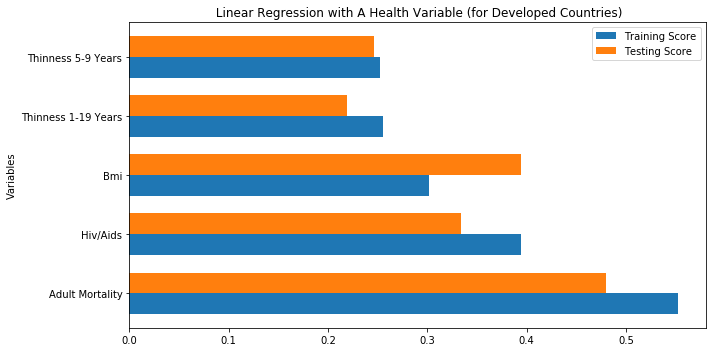

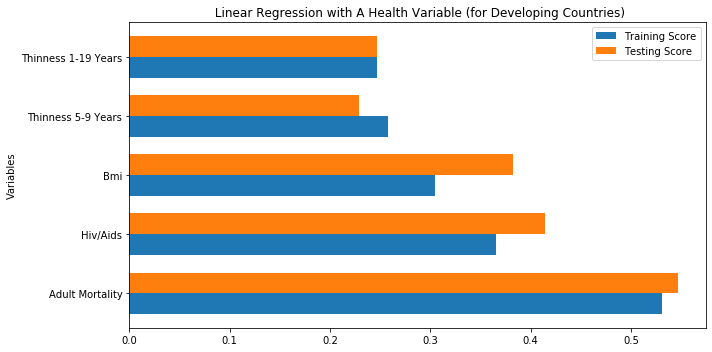

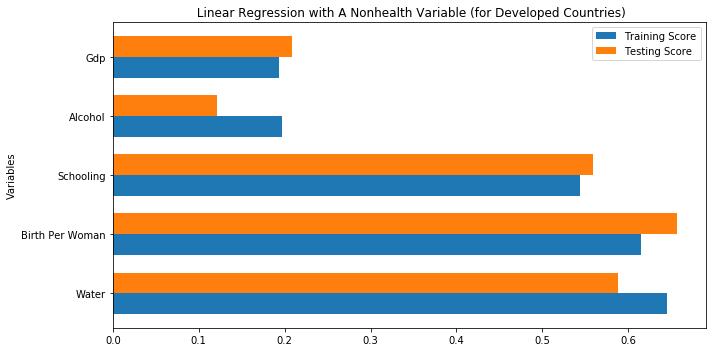

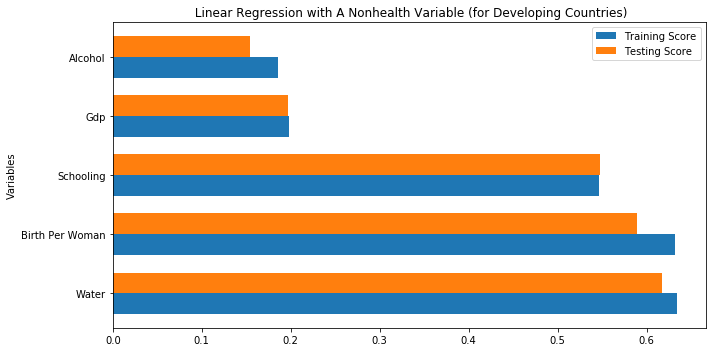

In [40]:
#Graphing Regression Results
for label in thelabels:
    top5 = linear1[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with A {titlepart[0].title()} Variable (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}1.png')

In [41]:
#2 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        resultstoo ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-1):
            value=others[o1]
            otherstoo = others[1:]
            for other in otherstoo:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy().dropna(how="any")
                if (value != other):
                    theX = [value, other]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
        scorestoo = pd.DataFrame(resultstoo)
        scorestoo = scorestoo.transpose().sort_values(by=['Training Score'], ascending=False)
        multilinear2[label] = scorestoo
multilinear2["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Bmi,0.639359,0.641251,Adult Mortality,-0.0427929,Bmi,0.152809,71.0907
Adult Mortality & Thinness 5-9 Years,0.633307,0.562332,Adult Mortality,-0.045386,Thinness 5-9 Years,-0.580483,80.225
Adult Mortality & Thinness 1-19 Years,0.594372,0.683991,Adult Mortality,-0.0445158,Thinness 1-19 Years,-0.606265,80.1598
Adult Mortality & Under-Five Deaths,0.584694,0.491819,Adult Mortality,-0.0511872,Under-Five Deaths,-0.00910389,78.8111
Bmi & Hiv/Aids,0.571053,0.568549,Hiv/Aids,0.200019,Bmi,-0.889557,63.9591


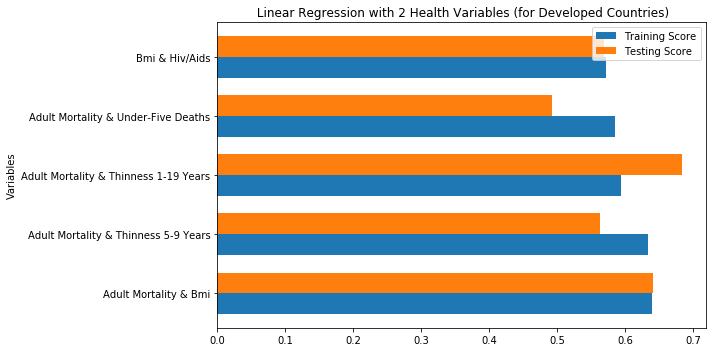

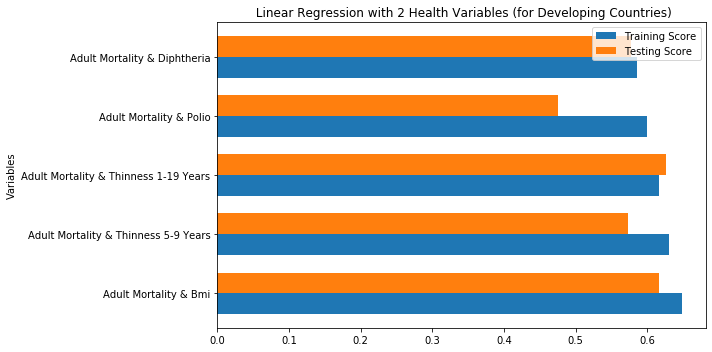

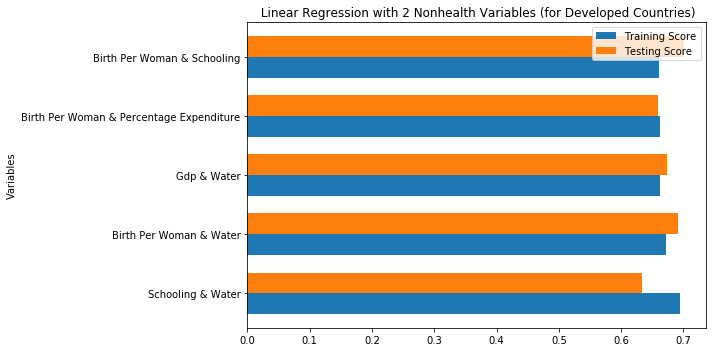

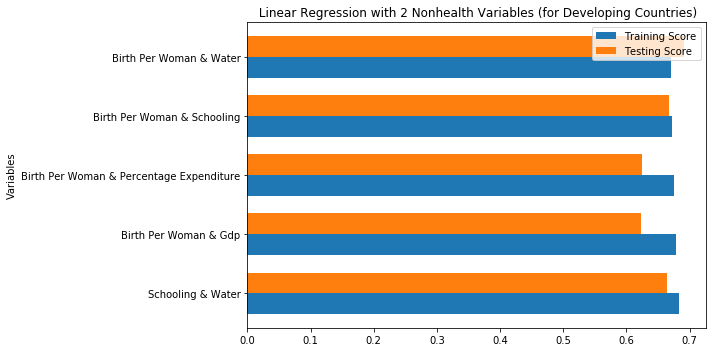

In [42]:
#Graphing 2 Variable Regression Results
for label in thelabels:
    top5 = multilinear2[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 2 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [43]:
#3 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        resultthree ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-2):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-1):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for other2 in othersthree:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy().dropna(how="any")
                    if (value != other) and (value != other2) and (other2 != other):
                        theX = [value, other,other2]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1,1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
        scoresthree = pd.DataFrame(resultsthree)
        scoresthree=scoresthree.transpose().sort_values(by=['Training Score'], ascending=False)
        multilinear3[label]=scoresthree
multilinear3["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Birth Per Woman & Hiv/Aids & Schooling,0.818323,0.803937,Birth Per Woman,-2.28271,Schooling,-0.688846,Hiv/Aids,1.16943,63.2903
Hiv/Aids & Schooling & Water,0.81496,0.814183,Schooling,-0.658851,Water,1.11174,Hiv/Aids,0.194887,40.8879
Adult Mortality & Birth Per Woman & Schooling,0.813631,0.761049,Adult Mortality,-0.0313958,Birth Per Woman,-2.20754,Schooling,0.858447,70.6795
Adult Mortality & Birth Per Woman & Hiv/Aids,0.812247,0.775435,Adult Mortality,-0.0206684,Birth Per Woman,-3.51513,Hiv/Aids,-0.410768,83.9341
Birth Per Woman & Hiv/Aids & Percentage Expenditure,0.809651,0.75959,Birth Per Woman,-3.77641,Hiv/Aids,-0.656948,Percentage Expenditure,0.000950395,81.2036


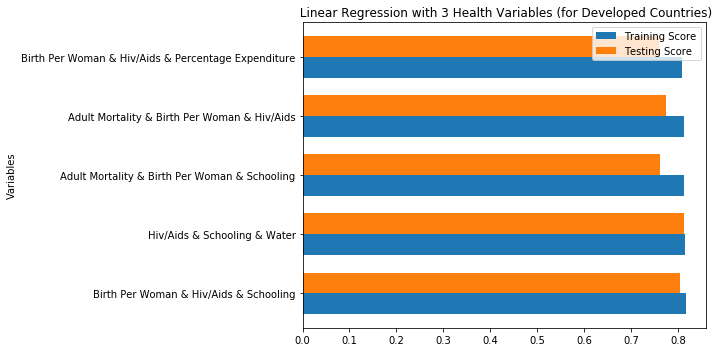

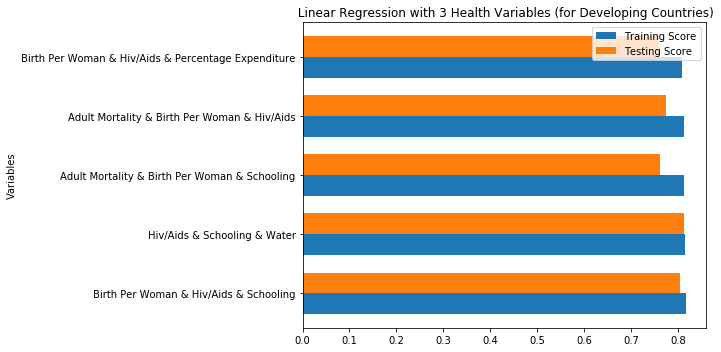

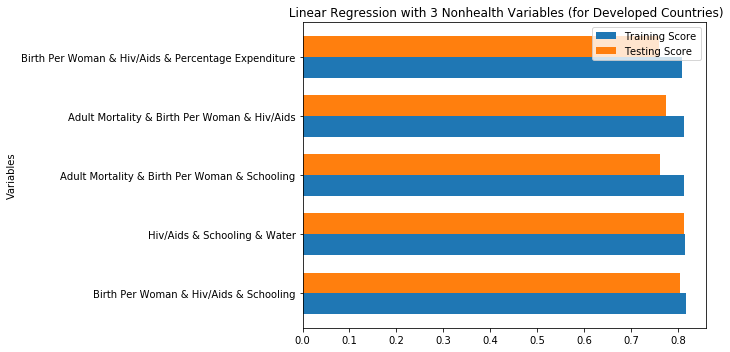

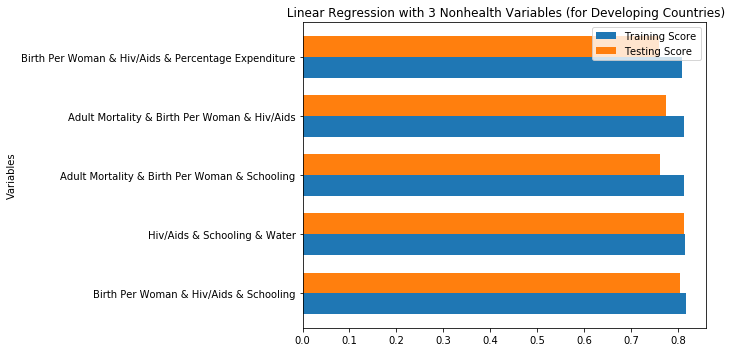

In [44]:
#Graphing 3 Variable Regression Results
for label in thelabels:
    top5 = multilinear3[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 3 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [ ]:
#4 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        resultsfour ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-3):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-2):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for o3 in range(len(othersthree)-1):
                    other2=otherstoo[o3+2]
                    othersfour = othersthree[1:]
                    for other3 in othersfour:
                        fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy().dropna(how="any")
                        if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                            theX = [value, other,other2,other3]
                            theX.sort()
                            X = fewdata[theX]
                            y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                            #Split Data into Train and Test
                            X_train, X_test, y_train, y_test = train_test_split(X, y)

                            model = LinearRegression()

                            model.fit(X_train, y_train)
                            training_score = model.score(X_train, y_train)
                            testing_score = model.score(X_test, y_test)

                            resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
        scoresfour = pd.DataFrame(resultsfour)
        scoresfour =scoresfour.transpose().sort_values(by=['Training Score'], ascending=False)
        multilinear4[label] = scoresfour
multilinear4["health_developed"].head()

In [ ]:
#Graphing 4 Variable Regression Results
for label in thelabels:
    top5 = multilinear2[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 4 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# All the Regression Datasets

In [45]:
#Grouping all to one list
allregressions= []
allregressions.append(linear1)
allregressions.append(multilinear2)
allregressions.append(multilinear3)
#allregressions.append(multilinear4)

In [46]:
datalab = ["linear1","multilinear2","multilinear3","multilinear4"]
for x in range(len(allregressions)):
    for y in list(allregressions[x].keys()):
        allregressions[x][y].to_csv(f'regressions/{datalab[x]}_{y}.csv')    